# 101对称二叉树
检查一个二叉树是否关于中轴线镜像对称  

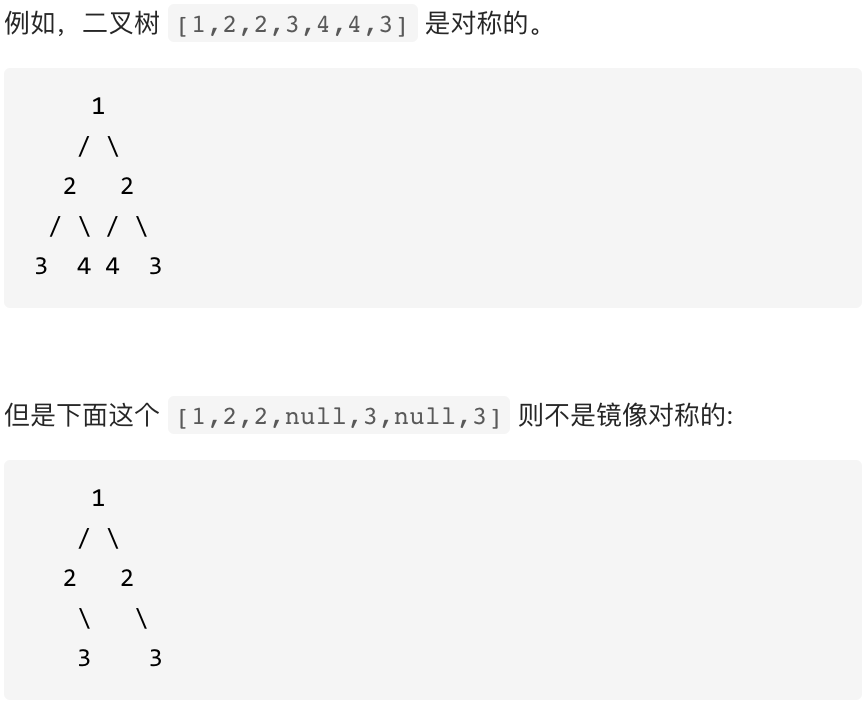

## 思路
需要比较的是根节点的左右子树，而不是左右孩子节点  

一个子树有里侧和外侧，分别比较两个子树的内外侧是否相等  
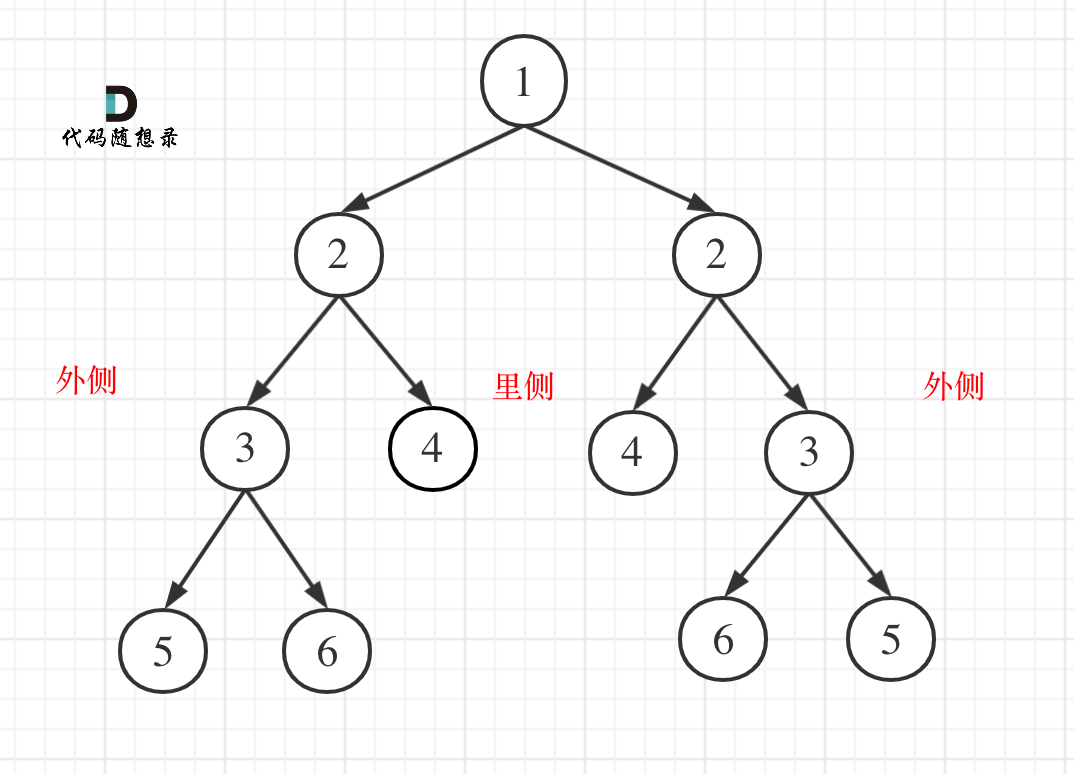

遍历方式：后序遍历（回溯）

两颗字树的里侧和外侧对应比较的节点其实互为镜像（一个是左孩子，另一个就是右孩子）  

准确的来说是一个树的遍历顺序是左右中，一个树的遍历顺序是右左中。

### 使用递归
1. 确定递归函数的参数和返回值  
- 参数：左子树节点和右子树节点
- 返回值：bool

2. 终止条件  
- 左空右不空、右空左不空：return false
- 左右都空：return true

左右都不为空直接比较数值是否相等就行

3. 单层递归的逻辑
- 左右节点都不为空，且数值相等（对称）才需要处理
  - 先比较外侧是否对成：左节点的左孩子，右节点的右孩子
  - 再比较内侧是否对称：左节点的右孩子，右节点的左孩子
  - 内外都对称才返回true

### 使用迭代
把左右子树要比较的节点按顺序放进容器，然后成对取出进行比较  

使用队列、栈都可以

In [ ]:
# 法一：栈迭代法
class TreeNode:
    def __init__(self, val=0, left = None, right=None) -> None:
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def isSymmetric(self, root:TreeNode) -> bool:
        if not root:
            return True   # 空树是对称的hhhhh
        
        stack = []
        stack.append(root.left)  # 左右子树的根节点
        stack.append(root.right)

        while stack:
            node_right = stack.pop()
            node_left = stack.pop()
            if not node_left and not node_right:
                continue  # 左右都为空满足对称条件，继续下一轮比较
            if not node_left or not node_right or node_left.val != node_right.val:
                return False    # 左右节点有一个为空或两节点不相等返回false
            # 按顺序成对入栈
            stack.append(node_left.left)    # 比较外侧对应节点
            stack.append(node_right.right)
            stack.append(node_left.right)   # 比较内侧的对应节点
            stack.append(node_right.left)
            
        return True
            

In [ ]:
# 递归,好写
class Solution:
    def isSymmetric(self, root:TreeNode) -> bool:
        if not root:
            return True
        return self.compare(root.left, root.right)
    
    def compare(self, left, right);
        # 排除空节点
        if left == None and right != None: return False
        elif right == None and left != None: return False
        elif left == None and right == None: return True
        # 排除非空节点但值不相等
        elif left.val != right.val: return False

        # 此时左右节点都不为空且数值相等，递归逻辑
        outside = self.compare(left.right, right.right)
        inside = self.compare(left.right, right.left)
        isSame = outside and inside
        return isSame